In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving all-data.csv to all-data.csv


In [ ]:
m_cols=['sentiment','headline']
data=pd.read_csv('all-data.csv',sep=',', names=m_cols,encoding='latin-1')

In [ ]:
data

,sentiment,headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


Text(0.5, 1.0, 'News Sentiment distribution')

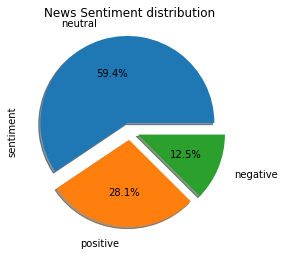

In [ ]:
v=data['sentiment'].value_counts().plot(kind='pie',autopct='%1.1f%%', labeldistance=1.2,explode=(0.1, 0.1, 0.1),shadow=True)
v.set_title('News Sentiment distribution')

In [ ]:
data.describe()

,sentiment,headline
count,4846,4846
unique,3,4838
top,neutral,The company serves customers in various indust...
freq,2879,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   headline   4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [ ]:
data.isnull().sum()

sentiment    0
headline     0
dtype: int64


1-Create new feature for the length of the Headline.

2-Create new feature for the word count of the Headline.


In [ ]:
from textblob import TextBlob

data['polarity'] = data['headline'].map(lambda text: TextBlob(text).sentiment.polarity)

data['headine_len'] = data['headline'].astype(str).apply(len)

data['word_count'] = data['headline'].apply(lambda x: len(str(x).split()))


In [ ]:
data

,sentiment,headline,polarity,headine_len,word_count
0,neutral,"According to Gran , the company has no plans t...",0.000000,127,25
1,neutral,Technopolis plans to develop in stages an area...,0.083333,190,31
2,negative,The international electronic industry company ...,0.000000,228,36
3,positive,With the new production plant the company woul...,-0.064802,206,33
4,positive,According to the company 's updated strategy f...,0.000000,203,41
...,...,...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,-0.500000,144,26
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,0.000000,148,30
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,0.000000,108,23
4844,negative,Net sales of the Paper segment decreased to EU...,0.040000,226,44


In [ ]:
data=data.drop('polarity',axis='columns')

In [ ]:
data

,sentiment,headline,headine_len,word_count
0,neutral,"According to Gran , the company has no plans t...",127,25
1,neutral,Technopolis plans to develop in stages an area...,190,31
2,negative,The international electronic industry company ...,228,36
3,positive,With the new production plant the company woul...,206,33
4,positive,According to the company 's updated strategy f...,203,41
...,...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,144,26
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,148,30
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,108,23
4844,negative,Net sales of the Paper segment decreased to EU...,226,44


In [ ]:
data['headline'][3]

'With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .'

# ***Data visualisation***
distributions, word frequencies,wordclouds....

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'headline length  Distribution')

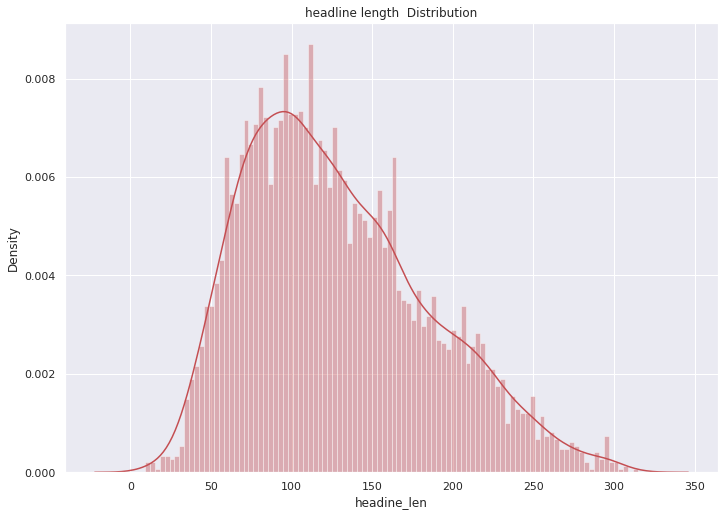

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sas=sns.distplot(data['headine_len'],bins=100,color='r')
sas.set_title('headline length  Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'word count Distribution')

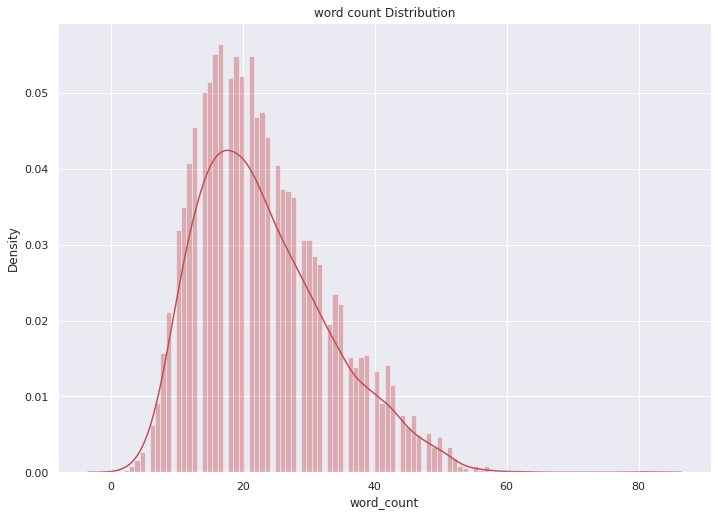

In [ ]:
sas=sns.distplot(data['word_count'],bins=100,color='r')
sas.set_title('word count Distribution')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['headline'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['headline' , 'count'])



eur 1018
company 851
said 545
finnish 524
mn 515
sales 455
million 440
net 413
profit 410
year 395
finland 353
group 324
2009 302
operating 299
2008 297
mln 291
new 277
business 270
period 266
quarter 258


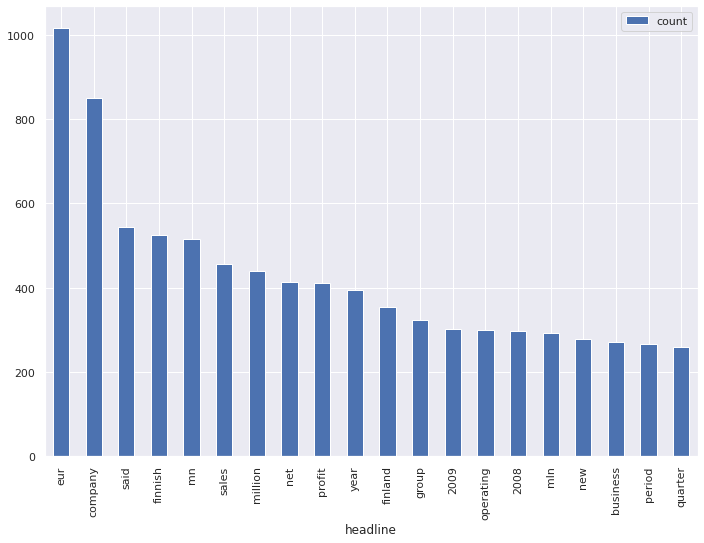

In [ ]:
df2.plot(x='headline',y='count',kind='bar')

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

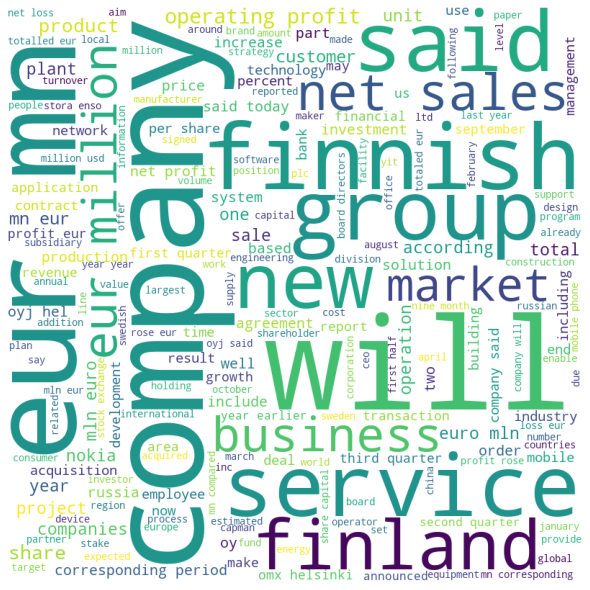

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in data.headline:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)


In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(data['headline'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['headline' , 'count'])

net sales 246
eur mn 196
operating profit 194
mn eur 127
corresponding period 108
mln euro 107
net profit 93
said today 86
oyj hel 85
company said 73
eur million 72
omx helsinki 63
profit eur 60
second quarter 57
euro mln 57
year earlier 56
mn corresponding 54
totalled eur 48
mln eur 48
net loss 47


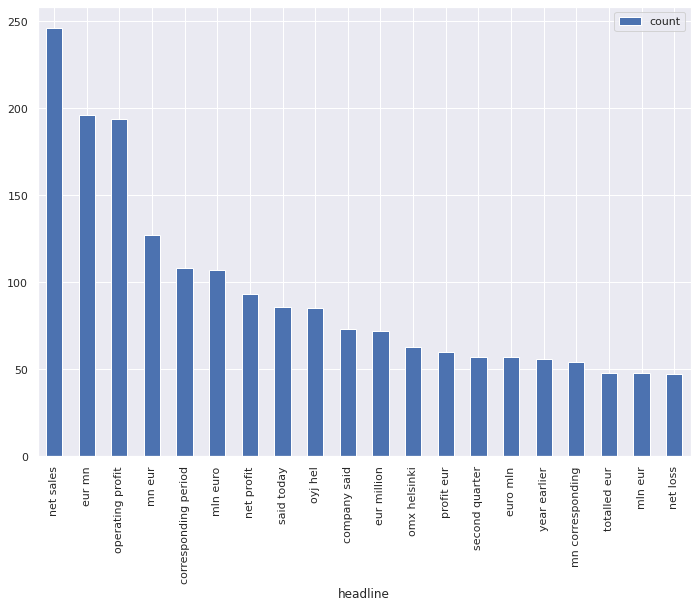

In [ ]:
df4.plot(x='headline',y='count',kind='bar')

# ***sentiment analysis preprocessing***
Tokenization,normalisation,vectorisation and model creation




In [ ]:
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# LinearSVC

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data['headline'], data.sentiment, test_size=0.1, random_state = 212)

pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

model = pipe.fit(x_train, y_train)

In [ ]:
prediction = model.predict(x_test)

print("accuracy score: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy score: 76.29%


In [ ]:
df = pd.DataFrame(prediction, 
             columns=['words'])
df.describe()

,words
count,485
unique,3
top,neutral
freq,320


In [ ]:
import pickle
with open('model_pickle1','wb') as file:
    pickle.dump(model,file)

Text(0.5, 1.0, 'News Sentiment distribution')

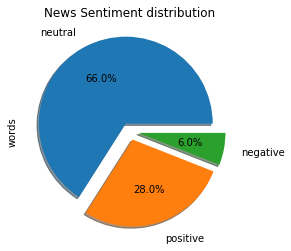

In [ ]:
v=df['words'].value_counts().plot(kind='pie',autopct='%1.1f%%', labeldistance=1.2,explode=(0.1, 0.1, 0.1),shadow=True)
v.set_title('News Sentiment distribution')

# neural network

## **1-Data Preprocessing**

In [ ]:
df_Positive = data[data['sentiment'] == 'positive']
df_Neutral = data[data['sentiment'] == 'neutral']
df_Negative = data[data['sentiment'] == 'negative']

In [ ]:
df = pd.concat([df_Positive, df_Neutral, df_Negative], axis=0) 

In [ ]:
df

,sentiment,headline,headine_len,word_count
3,positive,With the new production plant the company woul...,206,33
4,positive,According to the company 's updated strategy f...,203,41
5,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,178,25
6,positive,"For the last quarter of 2010 , Componenta 's n...",193,39
7,positive,"In the third quarter of 2010 , net sales incre...",125,29
...,...,...,...,...
4840,negative,HELSINKI Thomson Financial - Shares in Cargote...,248,40
4841,negative,LONDON MarketWatch -- Share prices ended lower...,144,26
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,108,23
4844,negative,Net sales of the Paper segment decreased to EU...,226,44


**Text Preprocessing**

In [ ]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

df['new_headline'] = df['headline'].apply(get_text_processing)
df.head()

,sentiment,headline,headine_len,word_count,new_headline
3,positive,With the new production plant the company woul...,206,33,new production plant company would increase ca...
4,positive,According to the company 's updated strategy f...,203,41,According company updated strategy years 20092...
5,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,178,25,FINANCING ASPOCOMP GROWTH Aspocomp aggressivel...
6,positive,"For the last quarter of 2010 , Componenta 's n...",193,39,last quarter 2010 Componenta net sales doubled...
7,positive,"In the third quarter of 2010 , net sales incre...",125,29,third quarter 2010 net sales increased 52 EUR ...


In [ ]:
df1 = df[['new_headline', 'sentiment']]
df1.head()

,new_headline,sentiment
3,new production plant company would increase ca...,positive
4,According company updated strategy years 20092...,positive
5,FINANCING ASPOCOMP GROWTH Aspocomp aggressivel...,positive
6,last quarter 2010 Componenta net sales doubled...,positive
7,third quarter 2010 net sales increased 52 EUR ...,positive


*Apply One hot encoding on negative, neutral, and positive* (dummy variables)

In [ ]:
dummies = pd.get_dummies(df1["sentiment"])
df1.drop(['sentiment'],axis=1,inplace=True)
df1 = pd.concat([df1,dummies],axis=1)
df1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,new_headline,negative,neutral,positive
3,new production plant company would increase ca...,0,0,1
4,According company updated strategy years 20092...,0,0,1
5,FINANCING ASPOCOMP GROWTH Aspocomp aggressivel...,0,0,1
6,last quarter 2010 Componenta net sales doubled...,0,0,1
7,third quarter 2010 net sales increased 52 EUR ...,0,0,1


# **2-model creation**

**Apply Train Test Split**


In [ ]:
X = df1['new_headline'].values
y = df1.drop('new_headline', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

vectorization

In [ ]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [ ]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=150, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predictions = text_classifier.predict(X_test)
predictions

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 0]], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(accuracy_score(y_test, predictions))

0.6801925722145805


In [ ]:
text=['this company is bad decreased million','good year great increase 100million','tesla continues to work']
text_count= vect.transform(text)
predic=text_classifier.predict(text_count)
predic

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [ ]:
import pickle
with open('model_pickle','wb') as file:
    pickle.dump(text_classifier,file)

### **Add different layers**

In [ ]:
model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

fit the model

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

Epoch 1/100
14/14 [==============================] - 65s 4s/step - loss: 0.8828 - accuracy: 0.5893 - val_loss: 0.7916 - val_accuracy: 0.6417
Epoch 2/100
14/14 [==============================] - 62s 4s/step - loss: 0.5101 - accuracy: 0.7588 - val_loss: 0.7502 - val_accuracy: 0.6960
Epoch 3/100
14/14 [==============================] - 62s 4s/step - loss: 0.1513 - accuracy: 0.9596 - val_loss: 1.3026 - val_accuracy: 0.7276
Epoch 4/100
14/14 [==============================] - 62s 4s/step - loss: 0.0442 - accuracy: 0.9876 - val_loss: 1.6139 - val_accuracy: 0.7276
Epoch 00004: early stopping


In [ ]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

23/23 [==============================] - 9s 397ms/step - loss: 1.6139 - accuracy: 0.7276
Test accuracy: 0.7276478409767151


In [ ]:
preds = model.predict(X_test)
preds

array([[2.4661051e-10, 9.9999988e-01, 9.8987222e-08],
       [2.6481709e-06, 5.7161540e-01, 4.2838195e-01],
       [7.9026108e-10, 2.3789858e-03, 9.9762100e-01],
       ...,
       [1.3983132e-06, 9.9895704e-01, 1.0415487e-03],
       [1.3274355e-06, 1.9870384e-02, 9.8012823e-01],
       [5.6011617e-05, 9.9960512e-01, 3.3885078e-04]], dtype=float32)

--------------------------------------
----------------------------------

# **3-saving the model**

In [ ]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'